In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the image
image = cv2.imread("/content/bagan.jpg")

In [3]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

(183, 275, 3)


In [4]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
print(pixel_values.shape)
# convert to float
pixel_values = np.float32(pixel_values)

(50325, 3)


In [5]:
print(pixel_values.shape)

(50325, 3)


In [6]:
# define stopping criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
print(criteria)

(3, 100, 0.2)


In [11]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [12]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [13]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

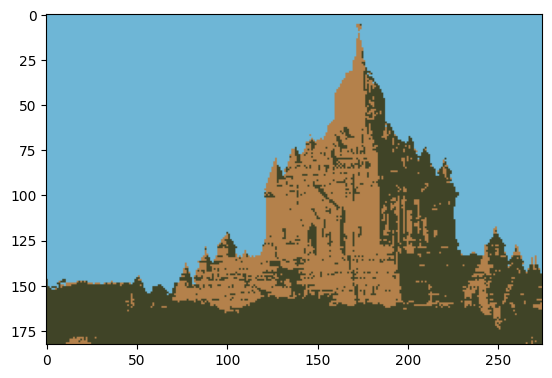

In [14]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

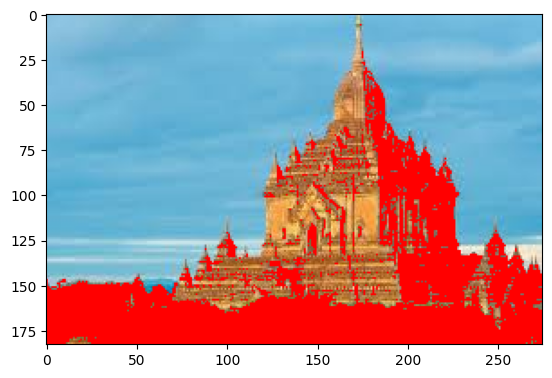

In [17]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [255, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()